# Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training 

## Random Forest Architecture

![Random Forest](datasets/Architecture-of-the-random-forest-model.png)


In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm, neighbors
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
train_split = 0.80
nrows = 10000000
path = 'c:/users/ugy1/abs/'
df=pd.read_csv(path+'datasets/processed_abs_loan_'+str(nrows)+'.csv', 
               #usecols=use_list, 
               #sep='\t',
               #compression=bz2,
               nrows=nrows,
               low_memory=False, 
              index_col=0, 
               parse_dates=True
              )
df.shape

(8871578, 90)

In [3]:
column_list=df.columns.tolist()

In [4]:
df.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,zerobalance_[],"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,label
0,16465.60,72,0.1647,1,549.0,0.067361,7837.02,872.49,0.1647,0.1647,...,1,0,0,0.0105,1.09,3.64,0.72,0.80,0.96,1.0
1,30657.95,61,0.0290,1,798.0,0.098100,22907.26,549.48,0.0290,0.0290,...,1,0,0,0.0093,0.93,3.84,0.66,0.57,0.89,0.0
2,17079.00,72,0.2067,2,514.0,0.172635,15907.47,597.61,0.2067,0.2067,...,1,0,0,0.0105,1.09,3.64,0.72,0.80,0.96,0.0
3,23175.48,60,0.9000,0,734.0,11.850000,13646.00,0.00,0.9011,0.9011,...,0,1,0,0.0097,0.93,3.71,0.63,0.56,0.86,0.0
4,38000.00,24,0.9000,0,804.0,11.150000,30140.43,0.00,0.9036,0.9036,...,0,1,0,0.0099,0.99,3.86,0.68,0.59,0.92,0.0


In [5]:
# prepare label for scikit-learn
Y=df.label.values
Y.shape

(8871578,)

In [6]:
# prepare input data for scikit-learn
input=df.values
input.shape

(8871578, 90)

In [7]:
# calculate train/test split

len_train = int(len(input)*train_split)
print(len_train)

7097262


In [8]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]
x_train = input[0:len_train]
x_test = input[len_train:]
x_train.shape

(7097262, 90)

In [9]:
export_x_test = pd.DataFrame(data=x_test)

In [10]:
export_x_test.columns=column_list
export_x_test.rename(columns={'label':'True Label'}, inplace=True)
export_x_test.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,zerobalance_[],"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,True Label
0,42381.27,61.0,0.0090,1.0,805.0,0.074365,5734.94,651.60,0.0090,0.0090,...,1.0,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0
1,12848.00,72.0,0.2292,1.0,573.0,0.166480,12610.67,428.71,0.2260,0.2260,...,1.0,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0
2,54312.19,60.0,2.9000,1.0,832.0,17.880000,41503.97,0.00,2.9384,2.9384,...,0.0,1.0,0.0,0.0093,0.99,3.86,0.68,0.59,0.92,0.0
3,31071.60,62.0,0.0000,2.0,750.0,0.030500,19160.82,0.00,0.0000,0.0000,...,1.0,0.0,0.0,0.0105,1.09,3.64,0.72,0.80,0.96,0.0
4,34282.03,62.0,0.0090,2.0,858.0,0.107264,26987.40,584.59,0.0090,0.0090,...,1.0,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0


In [11]:
#from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [12]:
x_scaler=StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

In [13]:
rfor=RandomForestClassifier()
clf_rfor = rfor.fit(x_train, y_train)
confidence_rfor=clf_rfor.score(x_test, y_test)

In [14]:
x_pred = x_test

In [15]:
prediction_rfor = clf_rfor.predict(x_pred)

In [16]:
#print(prediction_rfor)

In [17]:
export_x_test['Predicted Label']=prediction_rfor

In [18]:
export_x_test.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,True Label,Predicted Label
0,42381.27,61.0,0.0090,1.0,805.0,0.074365,5734.94,651.60,0.0090,0.0090,...,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0,0.0
1,12848.00,72.0,0.2292,1.0,573.0,0.166480,12610.67,428.71,0.2260,0.2260,...,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0,0.0
2,54312.19,60.0,2.9000,1.0,832.0,17.880000,41503.97,0.00,2.9384,2.9384,...,1.0,0.0,0.0093,0.99,3.86,0.68,0.59,0.92,0.0,0.0
3,31071.60,62.0,0.0000,2.0,750.0,0.030500,19160.82,0.00,0.0000,0.0000,...,0.0,0.0,0.0105,1.09,3.64,0.72,0.80,0.96,0.0,0.0
4,34282.03,62.0,0.0090,2.0,858.0,0.107264,26987.40,584.59,0.0090,0.0090,...,0.0,0.0,0.0107,1.10,3.44,0.68,1.22,0.91,0.0,0.0


In [19]:
export_x_test.shape

(1774316, 91)

In [20]:
export_x_test.to_csv(path+"prediction/randomForest/predicated_random_forest_abs_loans_"+str(nrows)+".csv", chunksize=10000)

In [21]:
def plot_confusion_matrix(cm, title, classes=['Non-Current', 'Current'],
                          cmap=plt.cm.Blues, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)

In [22]:
def plot_gridsearch_cv(results, estimator, x_min, x_max, y_min, y_max,save=False, saveas="MyFigure.png"):
    
    # print GridSearch cross-validation for parameters
    
    plt.figure(figsize=(10,8))
    plt.title("GridSearchCV for "+estimator, fontsize=24)

    plt.xlabel(estimator)
    plt.ylabel("Score")
    plt.grid()

    ax = plt.axes()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    pad = 0.005
    X_axis = np.array(results["param_"+estimator].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score+pad))

    plt.legend(loc="best")
    plt.grid('off')
    plt.tight_layout()
    if save:
        plt.savefig(saveas, dpi=100)
        
    plt.show()

             precision    recall  f1-score   support

Non-Current       1.00      1.00      1.00   1580330
    Current       1.00      1.00      1.00    193986

avg / total       1.00      1.00      1.00   1774316

AUC:  100.0%


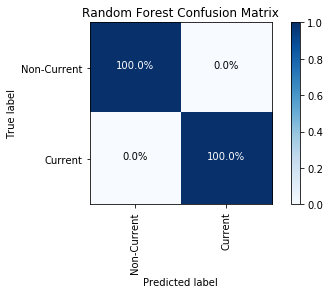

In [23]:
print(classification_report(y_test, prediction_rfor, target_names=['Non-Current', 'Current']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, prediction_rfor)))
cm = confusion_matrix(y_test, prediction_rfor)
plot_confusion_matrix(cm, title="Random Forest Confusion Matrix",save=True, 
                      saveas='prediction/randomForest/cm'+str(' Random Forest Accuracy-')+str(nrows)+'.jpg')


ROC_AUC_SCORE ;  1.0
Confusion matrix, without normalization
[[1580330       0]
 [      0  193986]]


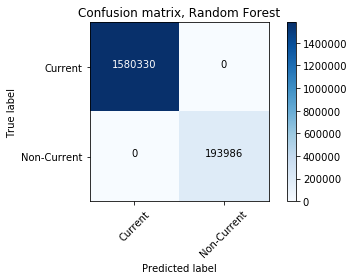

In [24]:
class_names = ['Current', 'Non-Current']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


print('ROC_AUC_SCORE ; ', roc_auc_score(y_test, prediction_rfor))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_rfor)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title= 'Confusion matrix, Random Forest')
plt.savefig('prediction/randomForest/cm'+str(' Random Forest Prediction-')+str(nrows)+'.jpg')
plt.show()